- **Programmer: Shaun Pritchard**
- **Date: 10-22-2021**
- **Assignment: 1**
- **Prof: M.DeGiorgio**
<hr>

# **CAP 52625 COMPUTATIONAL FOUDNATIONS OF AI**

## Elastic Net with Coordinate Descent - Assignment 2
<hr>

*Note: I decided to use symbols to make it easier to view to the implementation of code in contrast to the mathmatical thoeroms learned in class.*



## **Deliverables**

>
*   **Deliverable 1:**  Illustrate the effect of the tuning parameter on the inferred elastic net
regression coefficients by generating six plots (one for each 𝛼 value) of nine lines (one for each of the 𝑝 = 9 features), with the 𝑦-axis as 𝛽̂𝑗, 𝑗 = 1,2, … ,9, and the 𝑥-axis the
corresponding log-scaled tuning parameter value log10(𝜆) that generated the particular 𝛽̂𝑗.Label both axes in all six plots.
*   **Deliverable 2:** Illustrate the effect of the tuning parameters on the cross validation error by generating a plot of six lines 
*   **Deliverable 3:** Indicate the value of 𝜆 that generated the smallest CV(5)error
*   **Deliverable 4:** retrain  the  modelof 𝑁=400 observations and provide the estimates of the 𝑝=9 *best-fit* model parameters.
*   **Deliverable 5** Provide all your source code that you wrote from scratch.
*   **Deliverable 6**  Implement the assignment using statistical or machine learning libraries in a language of your choice.Compare the results with those obtained above.
> Note: 



## **Import Dataset**

In [ ]:
#Math libs
from math import sqrt
from scipy import stats
# Data Science libs
import numpy as np
import pandas as pd
# Graphics libs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#Timers
!pip install pytictoc
from pytictoc import TicToc

In [ ]:
# Mount Google Drive for data access
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Set up dataframe instance of dataset Credit_N400_p9.csv
df = pd.read_csv('/content/drive/MyDrive/Florida_Atlantic_University/Computational_Foundations_of_ AI/Credit_N400_p9.csv')
# uncomment below to load file direclty
# df = pd.read_csv('/content/Credit_N400_p9.csv')

In [ ]:
# Build copy of dataset for Pre-proccessing
df1 = df.copy()
# Validate new dataframe
df1.head(3)

## **Pre-proccess Data**

In [ ]:
# Assign dummy variables to catigorical feature attributes
df1 = df1.replace({'Male': 0, 'Female':1, 'No': 0, 'Yes': 1})

In [ ]:
# Seperate independant and dependant features
X = df1.drop(['Balance'], axis=1)
y = df1['Balance']

In [ ]:
# Validate independent Features
X.head(3)

In [ ]:
# Validate dependent responding variables
y.head(3)

## **Standardized X and Center Y**

In [ ]:
# standardize X and convert to numpy array
X -= np.mean(X)/np.std(X)
X = np.array(X)

In [ ]:
#Store and seperate (row:col) in variable for X_p training/test set
X_row , X_col = X.shape 
print('(X_p) Row x Col:=', X_row, X_col)

In [ ]:
# Center Y and convert to numpy array
y -= np.mean(y)

In [ ]:
# Split centered (:col) of Y feature
Y_col = y.shape
print('(Y_p) Col:=', Y_col)

## **Assign local variables**

In [ ]:

# 9-Tuning Parms
λ  = np.array([1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6])

# learning & convergence rate
α =  np.array([0, 0.2, 0.4, 0.6, 0.8, 1])

# K-folds
k = 5

#Iterations
q = 1000 # itterations

#log base of lambda
λ_log = np.log10(λ) 




## **Precompute 𝑏k**
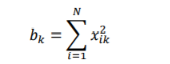

In [ ]:
b = np.zeros(9)
X2 = X**2
b = X2.sum(axis=0)
b

## **Coordinate Descent Algorithm**

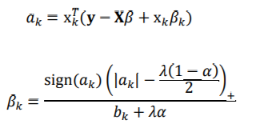

In [ ]:
def coordinate_descent(X, y, lamb, α ):
  # Empty list to hold MSE errors
    MSE = []
    # 𝛽x=np.random.uniform(-1, 1, 9)
    𝛽x = np.random.uniform(-1,1,X_col) 
    for i in range(q):   
        for k in range(len(𝛽x)):            
            a_k  = np.dot(X[:, k].T, np.add(y - np.dot(X, 𝛽x), np.multiply(𝛽x[k], X[:, k])))
            𝛽x[k] = (np.sign(a_k) * max(0, np.abs(a_k) - (lamb*(1-α)/2)) / np.add(b[k], lamb*α))
           
           
            # Calculate MSE and convergance
            𝛽x_temp = 𝛽x           
            ŷ = np.dot(X, 𝛽x)
            MSE_temp = np.mean(np.square(y - ŷ))
            MSE.append(MSE_temp)
            𝛽t = np.abs((𝛽x - 𝛽x_temp)/𝛽x_temp)
            𝛽m = np.max(𝛽t)  
# Console log to test my code:
#-------------- Feature Testing Output----------------------------------- 

        if (𝛽m < α):
            print("Testing:\nCoordinate Descent breaks on: {i} iteration".format(i=i))
            break      
        # Test for convergance error 
    if (MSE[-1] < MSE[0]): #Check MSE is lower than the initial value
        pass 
    else :
        print("Testing:\n Error not converging with lambda = {λ}param".format(λ=λ))
    # Output updated coefficients and MSE

    return 𝛽x, MSE

## **Deliverable 1.1**

In [ ]:
# Test tunning paremters inferred on coordinate descent algorithm
# Set count and timer to get convergance data on learning rate and tuning params
np.seterr(invalid='ignore')
𝛽_lst = []
count = 0
t = TicToc()  # create instance of class
start_time= t.tic() #start timer
for i, lamb in enumerate(λ):
    count += 1 
    end_time = t.toc()
    print('Tuning parameter converged at = #{c} λ {} at alpha{α}\n'.format(lamb, c=count,  α=α[0]))
    𝛽x, MSE = coordinate_descent(X, y, lamb, α[0] )
    𝛽_lst.append(𝛽x)

In [ ]:
# Output Deviverable 1: inferred tuning parmeters of coordinate descent
sns.set_theme()
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":" })
dev1 = pd.DataFrame(𝛽_lst)
dev1.index=λ
dev1.columns=['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Gender', 'Student', 'Married']
dev1.plot()
plt.rcParams["figure.figsize"] = (16,10)
plt.xscale('log')
plt.xlabel('λ Tuning Params')
plt.ylabel('p=9 features')
plt.legend(loc='upper left')
plt.savefig('SPritchard_CAP5625_Assignment2_Deliverable1.jpg')
plt.show()

## **Deliverable 1.2**

## **Deliverable 1.3**

## **Deliverable 1.4**

## **Deliverable 1.5**

## **Deliverable 1.6**

## **(5)K-Fold Grid Search Cross Validation Algorithm**
- (5)K-fold Grid Cross Validation calualted Batch Gradient Decent Ridge Regression with hyperparameter tuning
- Use grid search CV to trian and test 5 k folds
- Calculate test and trainging errors
- Test MSE on tuning params

In [ ]:
Y = y

# https://github.com/michaelkeller21/CF-Portfolio/blob/96d41dc3e9091a9f3e7e06e1b8d8bfb207178b23/CAP-5625-Programming-Assignment-2-Michael-Keller.ipynb

In [ ]:
# Implement start and end of test k-fold data split
X_row = X.shape[0]
# Divide absolute row features by k = 5
X_row_test = X_row // k
# Store data in k-fold array (Kfold/Kfold_ )
Kfold = [ X_row_test * ind for ind in range(k)] # initial k-folds 
Kfold_ = [ ind + X_row_test for ind in Kfold ]  # End k-folds 

In [ ]:
print(Kfold)

In [ ]:
print(Kfold_)

In [ ]:
# Seperate dependant n X 1 feature Y and reshape to (400 x 1) vector numpy array
y = np.array(df1.iloc[:,-1], dtype='float64').reshape([-1,1])
# Test print Y feature data conversion results
print('Dependant Feature:{Y}\n \nValidate array:(row:col)\n' .format(Y = Y.shape))
for i in Y:
    print(i, end = ' ')

In [ ]:
y.shape

In [ ]:
Y_train = np.row_stack(Y[CV_fold:])
y

In [ ]:
y = Y

In [ ]:
# Grid Cross Validation for Batch Gradient Decent Ridge Regression with hyperparameter tuning
# Instantiate empty list to hold Cross vlaidations errors
CV = [] 
# Add a counter to iterate tuning params and errors
for i, l in enumerate(λ) :
    # print('(5)K-fold CV tuning parameter error = {}'.format(l))
    MSE = [] 
    # Loop through K trianing and test vectors
    for i in range(k):
        #Hold-out 5 k-folds arrays (80 x 9)
        CV_fold = Kfold[i]
        CV_fold_ = Kfold_[i]
        # Seperate training feature variables
        X_train = np.vstack(( X[0:CV_fold,:] , X[CV_fold_:, :] ))
        Y_train = np.vstack(( Y[0:CV_fold,:] , Y[CV_fold_:, :] ))
        

        # Seperate testing feature variables
        X_test   = X[CV_fold:CV_fold_, :]
        Y_test   = y[CV_fold:CV_fold_, :]
        # Standardize X test set
        X_test_ = (X_test - np.mean(X_test, axis=0))/np.std(X_test, axis=0) 
        # Center Y test set
        Y_test_ =  Y_test - np.mean(Y_test, axis=0)
        # Implement ridge regressionand MSE on test data
        𝛽x, _ = coordinate_descent(X, y, lamb, 0)
        # Product transofrmation of test data on trining set
        ŷ = np.dot(X_test_, 𝛽x) 
        # Claulate average squareroot of Y(test)- ŷ variables
        err = np.mean(np.square(Y_test_ - ŷ))
        # Append calualtion to MSE list
        MSE.append(err)
    #Caluate average of updated MSE    
    CV_err = np.mean(MSE)
    # Append averaged MSE variables to CV list
    CV.append(CV_err)   

In [ ]:
# console log  to test CV code
#-------------- Feature Testing -----------------------------------
print('Initial (5)K-folds', Kfold, '\n')
print('Ending  (5)K-folds', Kfold_, '\n')
print(X_test.shape, Y_test.shape, X_train.shape, Y_train.shape, '\n')
print(X_test[0,0], Y_test[0,0], X_train[0,0], Y_train[0,0], '\n')  
print("Mean Square Error",err, '\n')
print("MSE value",MSE, '\n')
print("CV_error", CV_err, '\n')


## **Deliverable 2**
- Illustrate the effect of the tuning parameter on the cross validation error by generating a plot.
- Grid Cross Validation tuning errors for each tuning parameter value, perform five-fold cross validation and choose the value of 𝜆 that gives the smallest value.

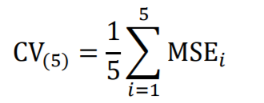

## **Deliverable 3**

- Indicate the value of 𝜆 that generated the smallest CV(5) error

In [ ]:
#Find minimum MSE error
err = min(MSE)
# index MSE error 
i = MSE.index(err)
# Itereate to find MSe from λ list
l = λ[i]
# Output final results of lowest λ tuning param
print("Best CV error of λ = {e}\nBest tuning param of λ = {l}".format(e=err, l=l))

## **Deliverable 4**
- Given the optimal 𝜆, retrain your model on the entire dataset of 𝑁 = 400
observations and provide the estimates of the 𝑝 = 9 best-fit model parameters.

In [ ]:
# Retrain model based on λ = 10.0
𝛽x, _dh = RidgeRegression_BGD(X_p, Y_p, α, l)
# Output best fit model params of  𝛽x based on on λ = 10.0 tuning param
print('Best fit model parameters', '\n', 𝛽x)